## Missing values data check
https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [4]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

In [5]:
!pip install psycopg2

In [28]:

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

ed2_df = pd.read_sql_query('SELECT * FROM useducation',con=engine)

In [29]:

ed2_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [8]:
ed2_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [9]:
ed2_df.isnull()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1488,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1489,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1490,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False


In [10]:
for column_name in ed2_df.columns:
    print("Unique values in column {} are: {}".format(column_name, ed2_df[column_name].unique()))

Unique values in column PRIMARY_KEY are: ['1992_ALABAMA' '1992_ALASKA' '1992_ARIZONA' ... '2017_WEST_VIRGINIA'
 '2017_WISCONSIN' '2017_WYOMING']
Unique values in column STATE are: ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'WYOMING' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND'
 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DOD_OVERSEAS' 'DOD_DOMESTIC' 'AMERICAN_SAMOA'
 'GUAM' 'NORTHERN_MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'BI' 'DD'
 'NORTHERN_MARIANA_ISLANDS' 'DEPARTMENT_OF_DEFENSE'
 'BUREAU_OF_INDIAN_E

In [30]:
for column_name in ed2_df.columns:
    print (f'{column_name} missing value % is', (1- ed2_df[column_name].count()/len(ed2_df))*100)

PRIMARY_KEY missing value % is 0.0
STATE missing value % is 0.0
YEAR missing value % is 0.0
ENROLL missing value % is 17.627345844504017
TOTAL_REVENUE missing value % is 14.209115281501338
FEDERAL_REVENUE missing value % is 14.209115281501338
STATE_REVENUE missing value % is 14.209115281501338
LOCAL_REVENUE missing value % is 14.209115281501338
TOTAL_EXPENDITURE missing value % is 14.209115281501338
INSTRUCTION_EXPENDITURE missing value % is 14.209115281501338
SUPPORT_SERVICES_EXPENDITURE missing value % is 14.209115281501338
OTHER_EXPENDITURE missing value % is 17.627345844504017
CAPITAL_OUTLAY_EXPENDITURE missing value % is 14.209115281501338
GRADES_PK_G missing value % is 11.595174262734586
GRADES_KG_G missing value % is 8.847184986595169
GRADES_4_G missing value % is 8.780160857908847
GRADES_8_G missing value % is 8.780160857908847
GRADES_12_G missing value % is 8.780160857908847
GRADES_1_8_G missing value % is 8.780160857908847
GRADES_9_12_G missing value % is 8.780160857908847
GR

In [31]:
# fill all floats with mean of total dataset
for column_name in ed2_df.columns:
    if ed2_df[column_name].dtype in ('float64',):
       ed2_df[column_name].fillna(ed2_df[column_name].mean(), inplace=True)

In [32]:
# check if there is any null values 
for column_name in ed2_df.columns:
    print (f'{column_name} missing value % is', (1- ed2_df[column_name].count()/len(ed2_df))*100)

PRIMARY_KEY missing value % is 0.0
STATE missing value % is 0.0
YEAR missing value % is 0.0
ENROLL missing value % is 0.0
TOTAL_REVENUE missing value % is 0.0
FEDERAL_REVENUE missing value % is 0.0
STATE_REVENUE missing value % is 0.0
LOCAL_REVENUE missing value % is 0.0
TOTAL_EXPENDITURE missing value % is 0.0
INSTRUCTION_EXPENDITURE missing value % is 0.0
SUPPORT_SERVICES_EXPENDITURE missing value % is 0.0
OTHER_EXPENDITURE missing value % is 0.0
CAPITAL_OUTLAY_EXPENDITURE missing value % is 0.0
GRADES_PK_G missing value % is 0.0
GRADES_KG_G missing value % is 0.0
GRADES_4_G missing value % is 0.0
GRADES_8_G missing value % is 0.0
GRADES_12_G missing value % is 0.0
GRADES_1_8_G missing value % is 0.0
GRADES_9_12_G missing value % is 0.0
GRADES_ALL_G missing value % is 0.0
AVG_MATH_4_SCORE missing value % is 0.0
AVG_MATH_8_SCORE missing value % is 0.0
AVG_READING_4_SCORE missing value % is 0.0
AVG_READING_8_SCORE missing value % is 0.0


In [14]:
ed2_df.head(100)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,9.159308e+05,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,9.159308e+05,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,9.159308e+05,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,9.159308e+05,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,9.159308e+05,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1993_TENNESSEE,TENNESSEE,1993,8.446680e+05,3268642.0,334410.0,1535027.0,1399205.0,3286481.0,1969619.0,...,65646.0,64124.0,47668.0,534579.0,236542.0,780663.0,234.768293,278.414711,218.866154,263.661132
96,1993_TEXAS,TEXAS,1993,3.535333e+06,20267205.0,1233446.0,9919561.0,9114198.0,18574871.0,8914245.0,...,284394.0,274208.0,178889.0,2291961.0,927209.0,3339616.0,234.768293,278.414711,218.866154,263.661132
97,1993_UTAH,UTAH,1993,4.623230e+05,1638305.0,116791.0,928596.0,592918.0,1665011.0,881924.0,...,35467.0,38031.0,31692.0,287657.0,137235.0,427582.0,234.768293,278.414711,218.866154,263.661132
98,1993_VERMONT,VERMONT,1993,9.745400e+04,837540.0,34179.0,216778.0,586583.0,809853.0,405876.0,...,8457.0,7496.0,6227.0,65038.0,27377.0,94439.0,234.768293,278.414711,218.866154,263.661132


In [15]:
#3 again read data
ed3_df = pd.read_sql_query('SELECT * FROM useducation',con=engine)

In [16]:
ed3_df['YEAR'].unique()


array([1992, 2001, 1993, 2016, 1994, 1995, 1996, 1997, 1998, 1999, 2017,
       2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [17]:
# now fill nulls with mean of the values in same year  
# fill all floats with mean of total dataset
for year_var in ed3_df['YEAR'].unique():
    for column_name in ed3_df.columns:
      if ed3_df[column_name].dtype in ('float64',):
          ed3_df.loc[(ed3_df['YEAR'] == year_var) & (ed3_df[column_name].isnull()), column_name] = ed3_df[ed3_df['YEAR'] == year_var][column_name].mean()
         

In [18]:
ed3_df[ed3_df['YEAR']== 1992].head(100)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,...,57948.0,58025.0,41167.0,471564.0,196386.0,6.761740e+05,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,NaN,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,...,9748.0,8789.0,6714.0,79117.0,30847.0,1.123350e+05,218.410116,266.360319,212.712256,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,...,55433.0,49081.0,37410.0,437127.0,175210.0,6.148810e+05,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,...,34632.0,36011.0,27651.0,281338.0,123113.0,4.052590e+05,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4.717112e+06,208.398961,260.892247,196.764414,263.307067
5,1992_COLORADO,COLORADO,1992,NaN,3.185173e+06,1.632530e+05,1.307986e+06,1.713934e+06,3.264826e+06,1.642466e+06,...,50648.0,45025.0,34533.0,394904.0,160299.0,5.626130e+05,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3.834302e+06,1.435420e+05,1.342539e+06,2.348221e+06,3.721338e+06,2.148041e+06,...,38058.0,33691.0,28366.0,304284.0,126917.0,4.369320e+05,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,6.452330e+05,4.594500e+04,4.209420e+05,1.783460e+05,6.387840e+05,3.727220e+05,...,8272.0,8012.0,6129.0,67495.0,28338.0,9.629600e+04,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,7.094800e+05,6.474900e+04,0.000000e+00,6.447310e+05,7.428930e+05,3.291600e+05,...,5832.0,5000.0,3433.0,47009.0,18173.0,7.000000e+04,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,1.150630e+07,7.884200e+05,5.683949e+06,5.033930e+06,1.130564e+07,5.166374e+06,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1.819706e+06,213.689751,259.908848,204.882606,262.118986


In [19]:
# check if there is any null values 
for column_name in ed3_df.columns:
    print (f'{column_name} missing value % is', (1- ed3_df[column_name].count()/len(ed3_df))*100)
# still missing values as few years not havingg any value 

PRIMARY_KEY missing value % is 0.0
STATE missing value % is 0.0
YEAR missing value % is 0.0
ENROLL missing value % is 7.1715817694369965
TOTAL_REVENUE missing value % is 3.4182305630026777
FEDERAL_REVENUE missing value % is 3.4182305630026777
STATE_REVENUE missing value % is 3.4182305630026777
LOCAL_REVENUE missing value % is 3.4182305630026777
TOTAL_EXPENDITURE missing value % is 3.4182305630026777
INSTRUCTION_EXPENDITURE missing value % is 3.4182305630026777
SUPPORT_SERVICES_EXPENDITURE missing value % is 3.4182305630026777
OTHER_EXPENDITURE missing value % is 7.1715817694369965
CAPITAL_OUTLAY_EXPENDITURE missing value % is 3.4182305630026777
GRADES_PK_G missing value % is 6.836461126005366
GRADES_KG_G missing value % is 6.836461126005366
GRADES_4_G missing value % is 6.836461126005366
GRADES_8_G missing value % is 6.836461126005366
GRADES_12_G missing value % is 6.836461126005366
GRADES_1_8_G missing value % is 6.836461126005366
GRADES_9_12_G missing value % is 6.836461126005366
GRA

In [20]:

ed_df = pd.read_sql_query('SELECT * FROM useducation',con=engine)
#ed5_df.interpolate(method ='linear', limit_direction ='forward') 
#ed5_df['AVG_READING_8_SCORE']=ed5_df['AVG_READING_8_SCORE'].interpolate(method ='linear', limit_direction ='forward')
ed4_df_f = ed_df.interpolate(method='linear')
ed4_df = ed4_df_f.interpolate(method='linear',limit_direction='backward')

/var/folders/9_/1k3n4lms2cg9br6mjz1f_cq80000gp/T/ipykernel_54642/3710050292.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ed4_df_f = ed_df.interpolate(method='linear')
/var/folders/9_/1k3n4lms2cg9br6mjz1f_cq80000gp/T/ipykernel_54642/3710050292.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ed4_df = ed4_df_f.interpolate(method='linear',limit_direction='backward')


In [21]:
# check if there is any null values 
for column_name in ed4_df.columns:
    print (f'{column_name} missing value % is', (1- ed4_df[column_name].count()/len(ed4_df))*100)

PRIMARY_KEY missing value % is 0.0
STATE missing value % is 0.0
YEAR missing value % is 0.0
ENROLL missing value % is 0.0
TOTAL_REVENUE missing value % is 0.0
FEDERAL_REVENUE missing value % is 0.0
STATE_REVENUE missing value % is 0.0
LOCAL_REVENUE missing value % is 0.0
TOTAL_EXPENDITURE missing value % is 0.0
INSTRUCTION_EXPENDITURE missing value % is 0.0
SUPPORT_SERVICES_EXPENDITURE missing value % is 0.0
OTHER_EXPENDITURE missing value % is 0.0
CAPITAL_OUTLAY_EXPENDITURE missing value % is 0.0
GRADES_PK_G missing value % is 0.0
GRADES_KG_G missing value % is 0.0
GRADES_4_G missing value % is 0.0
GRADES_8_G missing value % is 0.0
GRADES_12_G missing value % is 0.0
GRADES_1_8_G missing value % is 0.0
GRADES_9_12_G missing value % is 0.0
GRADES_ALL_G missing value % is 0.0
AVG_MATH_4_SCORE missing value % is 0.0
AVG_MATH_8_SCORE missing value % is 0.0
AVG_READING_4_SCORE missing value % is 0.0
AVG_READING_8_SCORE missing value % is 0.0


In [22]:
# compare 3 df
def print_missing(df):
    for column_name in df.columns:
        print (f'{column_name} missing value % is', (1- df[column_name].count()/len(ed4_df))*100)
# ed2_df ed3_df ed5_df
print('dataframe filled with total means')
print_missing(ed2_df)
print('dataframe filled with total means by year')
print_missing(ed3_df)
print('dataframe filled with interpolation')
print_missing(ed4_df)

dataframe filled with total means
PRIMARY_KEY missing value % is 0.0
STATE missing value % is 0.0
YEAR missing value % is 0.0
ENROLL missing value % is 0.0
TOTAL_REVENUE missing value % is 0.0
FEDERAL_REVENUE missing value % is 0.0
STATE_REVENUE missing value % is 0.0
LOCAL_REVENUE missing value % is 0.0
TOTAL_EXPENDITURE missing value % is 0.0
INSTRUCTION_EXPENDITURE missing value % is 0.0
SUPPORT_SERVICES_EXPENDITURE missing value % is 0.0
OTHER_EXPENDITURE missing value % is 0.0
CAPITAL_OUTLAY_EXPENDITURE missing value % is 0.0
GRADES_PK_G missing value % is 0.0
GRADES_KG_G missing value % is 0.0
GRADES_4_G missing value % is 0.0
GRADES_8_G missing value % is 0.0
GRADES_12_G missing value % is 0.0
GRADES_1_8_G missing value % is 0.0
GRADES_9_12_G missing value % is 0.0
GRADES_ALL_G missing value % is 0.0
AVG_MATH_4_SCORE missing value % is 0.0
AVG_MATH_8_SCORE missing value % is 0.0
AVG_READING_4_SCORE missing value % is 0.0
AVG_READING_8_SCORE missing value % is 0.0
dataframe fille

In [23]:
# data filled by year is still having missing values 
# now display head and see 
print('dataframe filled with total means')
ed2_df.head()
print('dataframe filled with total means by year')
ed3_df.head()
print('dataframe filled with interpolation')
ed4_df.head()

dataframe filled with total means
dataframe filled with total means by year
dataframe filled with interpolation


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,89711.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,258.859712
1,1992_ALASKA,ALASKA,1992,89711.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,89711.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,89711.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,89711.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676


In [25]:
ed2_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


In [26]:
ed2_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [27]:
ed2_df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


In [33]:
ca_df=ed2_df[ed2_df["STATE"]=='CALIFORNIA']

In [34]:
ca_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,26.000000
mean,2004.500000,5.558465e+06,5.400277e+07,5.595424e+06,2.994033e+07,1.846701e+07,5.443819e+07,2.699374e+07,1.571578e+07,2.716850e+06,...,433815.955943,421401.350562,373182.186486,3.457625e+06,1.666630e+06,5.013476e+06,230.914626,274.581860,214.231512,262.984793
std,7.648529,1.453627e+06,2.080078e+07,2.772270e+06,1.130360e+07,7.119280e+06,2.106949e+07,9.707657e+06,6.148098e+06,9.979660e+05,...,110979.775424,112079.119252,123097.626659,8.831550e+05,4.696341e+05,1.597506e+06,7.846646,5.792437,6.478335,3.044721
min,1992.000000,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,208.398961,260.892247,196.764414,254.895247
25%,1998.250000,5.628683e+06,3.650696e+07,2.925390e+06,2.113067e+07,1.245089e+07,3.491863e+07,1.864130e+07,1.026507e+07,2.011035e+06,...,439180.000000,407993.000000,303400.500000,3.535187e+06,1.538946e+06,5.002436e+06,231.580741,271.028892,210.161463,263.661132
50%,2004.500000,6.202819e+06,5.998909e+07,6.214862e+06,3.268723e+07,2.025660e+07,6.119892e+07,2.959327e+07,1.718461e+07,3.021886e+06,...,466585.500000,465644.500000,390187.500000,3.749212e+06,1.830786e+06,5.751751e+06,234.768293,278.414711,218.866154,263.661132
75%,2010.750000,6.226545e+06,7.046910e+07,7.522644e+06,3.767445e+07,2.372405e+07,7.096830e+07,3.454927e+07,2.064027e+07,3.487798e+06,...,483432.750000,475867.500000,477916.250000,3.803901e+06,1.962145e+06,5.828984e+06,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.060362e+07,8.532013e+07,4.258727e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,234.768293,278.414711,218.866154,269.197451


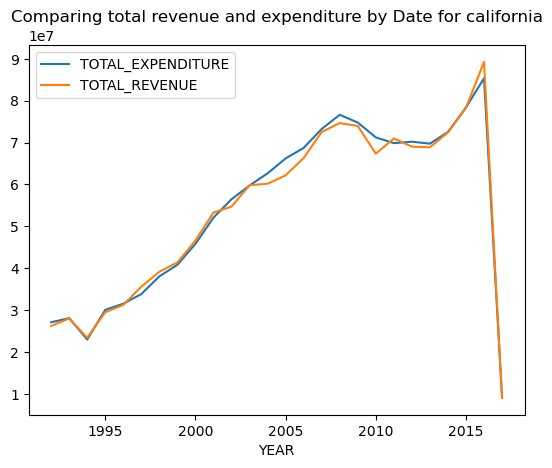

In [41]:
import matplotlib.pyplot as plt
fig = ca_df[
    ['YEAR', 'TOTAL_EXPENDITURE']].groupby('YEAR').mean().plot()

ca_df[
    ['YEAR', 'TOTAL_REVENUE']].groupby('YEAR').mean().plot(ax=fig)
plt.title('Comparing total revenue and expenditure by Date for california')
plt.show()


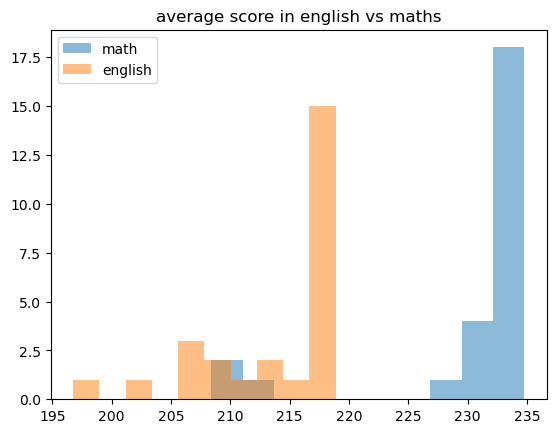

In [47]:

plt.hist(ca_df["AVG_MATH_4_SCORE"], alpha = .5 , label="math")
plt.hist(ca_df["AVG_READING_4_SCORE"], alpha = .5, label="english")
plt.title('average score in english vs maths')
plt.legend(loc='upper left')
plt.show()

In [48]:

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

rawdf = pd.read_sql_query('SELECT * FROM useducation',con=engine)

In [49]:
ca_rawdf=ed2_df[ed2_df["STATE"]=='CALIFORNIA']

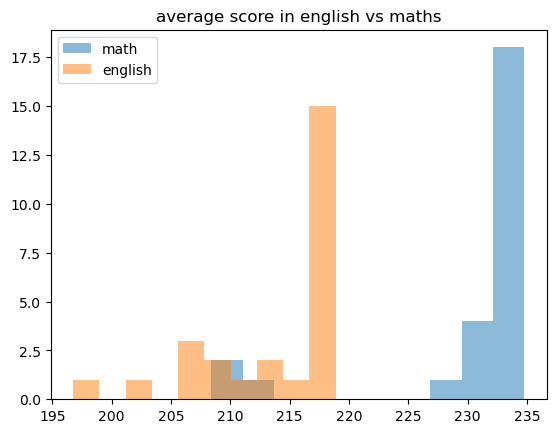

In [50]:
plt.hist(ca_rawdf["AVG_MATH_4_SCORE"], alpha = .5 , label="math")
plt.hist(ca_rawdf["AVG_READING_4_SCORE"], alpha = .5, label="english")
plt.title('average score in english vs maths')
plt.legend(loc='upper left')
plt.show()

In [56]:
ca_rawdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 4 to 1451
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   26 non-null     object 
 1   STATE                         26 non-null     object 
 2   YEAR                          26 non-null     int64  
 3   ENROLL                        26 non-null     float64
 4   TOTAL_REVENUE                 26 non-null     float64
 5   FEDERAL_REVENUE               26 non-null     float64
 6   STATE_REVENUE                 26 non-null     float64
 7   LOCAL_REVENUE                 26 non-null     float64
 8   TOTAL_EXPENDITURE             26 non-null     float64
 9   INSTRUCTION_EXPENDITURE       26 non-null     float64
 10  SUPPORT_SERVICES_EXPENDITURE  26 non-null     float64
 11  OTHER_EXPENDITURE             26 non-null     float64
 12  CAPITAL_OUTLAY_EXPENDITURE    26 non-null     float64
 13  GRADES_PK_